In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.offsetbox as offsetbox
import seaborn as sns
import plotly.express as px
import base64

In [2]:
# Import Dataset
life = pd.read_csv("c:/Users/HP/Desktop/JBS Research/Geriatric Health Blog/Life Expectancy/life_exp.csv", skiprows=3)

In [3]:
# View Dataset 
print(life.head())

                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                            Indicator Name  Indicator Code       1960  \
0  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  64.049000   
1  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  44.169658   
2  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  32.799000   
3  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  37.779636   
4  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  37.933000   

        1961       1962       1963       1964       1965  ...       2016  \
0  64.215000  64.602000  64.944000  65.303000  65.615000  ...  75.540000   
1  44.468838  44.877890  45.160583  45.535695  45.770723  ...  62.167981   
2  33.291000  33.757000  34.201000  34.673000  35.

In [4]:
# Drop empty columns
life = life.dropna(axis=1, how='all')
print(life.head())

                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                            Indicator Name  Indicator Code       1960  \
0  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  64.049000   
1  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  44.169658   
2  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  32.799000   
3  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  37.779636   
4  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  37.933000   

        1961       1962       1963       1964       1965  ...       2014  \
0  64.215000  64.602000  64.944000  65.303000  65.615000  ...  75.261000   
1  44.468838  44.877890  45.160583  45.535695  45.770723  ...  61.251436   
2  33.291000  33.757000  34.201000  34.673000  35.

In [5]:
# Drop Unneccesary Columns
life.drop(columns=['Indicator Name', 'Indicator Code'], inplace=True)


In [6]:
# Unpivot Years
melted_life = life.melt(id_vars=['Country Name', 'Country Code'],  
                    var_name='Year',  
                    value_name='Life Exp')
print(melted_life)

                      Country Name Country Code  Year   Life Exp
0                            Aruba          ABW  1960  64.049000
1      Africa Eastern and Southern          AFE  1960  44.169658
2                      Afghanistan          AFG  1960  32.799000
3       Africa Western and Central          AFW  1960  37.779636
4                           Angola          AGO  1960  37.933000
...                            ...          ...   ...        ...
17019                       Kosovo          XKX  2023  78.033000
17020                  Yemen, Rep.          YEM  2023  69.295000
17021                 South Africa          ZAF  2023  66.139000
17022                       Zambia          ZMB  2023  66.349000
17023                     Zimbabwe          ZWE  2023  62.775000

[17024 rows x 4 columns]


In [7]:
melted_life.rename(columns={'Country Name': 'Country'}, inplace=True)
print(melted_life)

                           Country Country Code  Year   Life Exp
0                            Aruba          ABW  1960  64.049000
1      Africa Eastern and Southern          AFE  1960  44.169658
2                      Afghanistan          AFG  1960  32.799000
3       Africa Western and Central          AFW  1960  37.779636
4                           Angola          AGO  1960  37.933000
...                            ...          ...   ...        ...
17019                       Kosovo          XKX  2023  78.033000
17020                  Yemen, Rep.          YEM  2023  69.295000
17021                 South Africa          ZAF  2023  66.139000
17022                       Zambia          ZMB  2023  66.349000
17023                     Zimbabwe          ZWE  2023  62.775000

[17024 rows x 4 columns]


In [8]:
# Format the columns
melted_life['Year'] = melted_life['Year'].astype(int)
melted_life['Life Exp'] = melted_life['Life Exp'].round(1)
melted_life.dtypes

Country          object
Country Code     object
Year              int64
Life Exp        float64
dtype: object

#### The country column contains different groups asides countries such as region and income groups. They wil be filtered out with a country code csv

In [9]:
# Import Country code CSV
geo_code = pd.read_csv('c:/Users/HP/Desktop/JBS Research/country_coding.csv')
geo_code = geo_code.drop('SpecialNotes', axis=1)
geo_code = geo_code.dropna(axis=1, how="all")
print(geo_code.head())

  Country Code                                             Region  \
0          ABW                          Latin America & Caribbean   
1          AFE                                                NaN   
2          AFG  Middle East, North Africa, Afghanistan & Pakistan   
3          AFW                                                NaN   
4          AGO                                 Sub-Saharan Africa   

           IncomeGroup                    TableName  
0          High income                        Aruba  
1                  NaN  Africa Eastern and Southern  
2           Low income                  Afghanistan  
3                  NaN   Africa Western and Central  
4  Lower middle income                       Angola  


In [10]:
# Rename Columns
geo_code.rename(columns={'Country Code':'Code'}, inplace=True)
melted_life.rename(columns={'Country Code':'Code'}, inplace=True)

In [11]:
# Create Table for Country, Region, IncomeGroup Life Expectancies

# Keep only rows in geo_code where Region and IncomeGroup are both present
geo_countries_only = geo_code[geo_code['Region'].notna() & geo_code['IncomeGroup'].notna()]

# Extract valid country names only
known_countries = geo_countries_only['TableName'].unique()

# Proceed with filtering
country_df = melted_life[melted_life['Country'].isin(known_countries)]
region_df = melted_life[melted_life['Country'].isin(geo_code['Region'].dropna().unique())]
income_df = melted_life[melted_life['Country'].isin(geo_code['IncomeGroup'].dropna().unique())]


In [12]:
# Rename Columns
region_df = region_df.rename(columns={'Country': 'Region'})
income_df = income_df.rename(columns={'Country': 'Income  Status'})

#Rename Categories
region_df['Region'] = region_df['Region'].replace({
    'Middle East, North Africa, Afghanistan & Pakistan': 'Middle East',
})


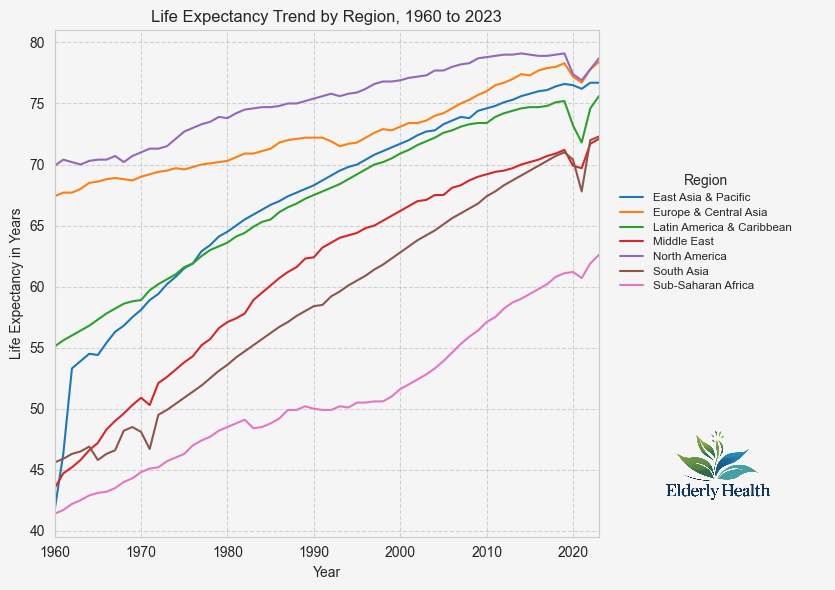

In [23]:
# Life Expectancy Trend by Region

# Filter only regions that have data from 1960
start_year = 1960
regions_to_include = region_df.groupby('Region').filter(lambda x: x['Year'].min() <= start_year)['Region'].unique()
filtered_region_df = region_df[region_df['Region'].isin(regions_to_include)]

# Create wider figure to accommodate legend + logo
plt.figure(figsize=(10, 6))

# Line plot
sns.lineplot(
    data=filtered_region_df,
    x='Year',
    y='Life Exp',
    hue='Region'
)

# Force x-axis to start at 1960 and end at 2023
plt.xlim(1960, 2023)

# Axis labels and title
plt.xlabel('Year')
plt.ylabel('Life Expectancy in Years')
plt.title('Life Expectancy Trend by Region, 1960 to 2023')

# Grid and light background
plt.grid(True, color='gray', linestyle='--', alpha=0.3)
plt.gca().set_facecolor('#f5f5f5')
plt.gcf().patch.set_facecolor('#f5f5f5')

# Legend outside with styling
plt.legend(
    title='Region',
    loc='center left',
    bbox_to_anchor=(1.02, 0.6),
    fontsize='small',
    title_fontsize='medium',
    frameon=False,
    labelspacing=0.4
)

# Load and place logo
logo_path = r'C:\Users\HP\Desktop\JBS Research\Geriatric Health Blog\Logo.png'
try:
    logo = mpimg.imread(logo_path)
    imagebox = offsetbox.OffsetImage(logo, zoom=0.1)
    logo_box = offsetbox.AnchoredOffsetbox(
        loc='lower left',
        child=imagebox,
        bbox_to_anchor=(1.02, 0.01),  # Adjust vertical placement
        bbox_transform=plt.gca().transAxes,
        borderpad=0,
        frameon=False
    )
    plt.gca().add_artist(logo_box)
except FileNotFoundError:
    print("Logo not found. Skipping logo overlay.")

# Adjust layout to make room for legend and logo
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()








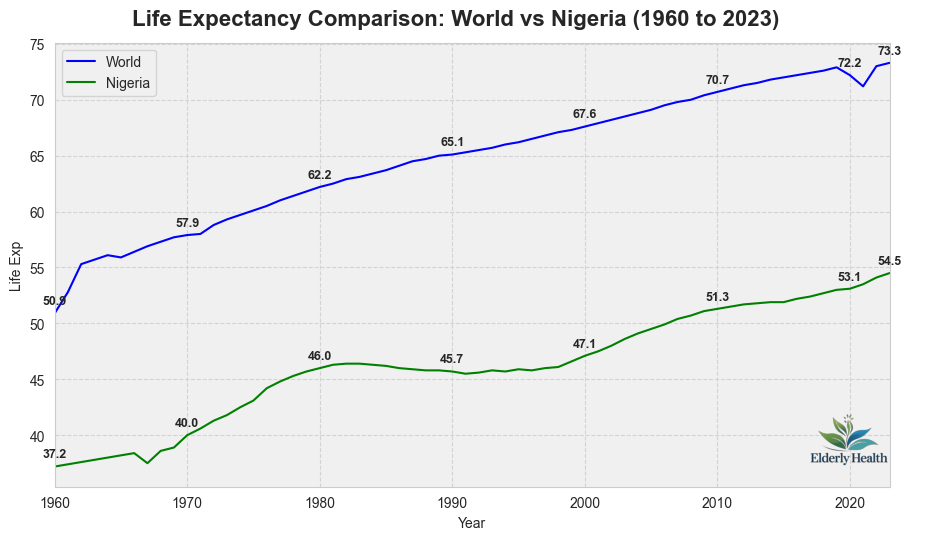

In [18]:
# Ensure full year range from 1960 to 2023
years = pd.Series(range(1960, 2025))
countries = ["World", "Nigeria"]

# Complete year-country grid
full_index = pd.MultiIndex.from_product([countries, years], names=["Country", "Year"])
data = melted_life[melted_life['Country'].isin(countries)].copy()
data = data.set_index(["Country", "Year"]).reindex(full_index).reset_index()

# Order countries
data['Country'] = pd.Categorical(data['Country'], categories=countries, ordered=True)

# Set up plot
plt.figure(figsize=(9, 5), constrained_layout=True)

# Set light non-white background
sns.set_style("whitegrid", {
    'axes.facecolor': '#f0f0f0',
    'grid.color': 'lightgrey',
    'grid.linestyle': '--'
})

# Plot lines
plot = sns.lineplot(
    data=data,
    x='Year',
    y='Life Exp',
    hue='Country',
    palette=['blue', 'green']
)

# Fix only X-axis
plt.xlim(1960, 2023)

# Remove legend title
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles=handles, labels=labels, title='')

# Annotate selected year points
for year in [1960, 1970, 1980, 1990, 2000, 2010, 2020, 2023]:
    year_data = data[data['Year'] == year]
    for _, row in year_data.dropna(subset=['Life Exp']).iterrows():
        plt.text(row['Year'], row['Life Exp'] + 0.8,
                 f"{row['Life Exp']:.1f}",
                 ha='center', fontsize=9, weight='bold')

# Add logo to bottom right
logo_path = r'C:\Users\HP\Desktop\JBS Research\Geriatric Health Blog\Logo.png'
try:
    img = mpimg.imread(logo_path)
    newax = plt.gcf().add_axes([0.85, 0.1, 0.17, 0.17], anchor='SE', zorder=1)
    newax.imshow(img)
    newax.axis('off')
except FileNotFoundError:
    print("Logo not found, skipping logo overlay.")

# Axis labels
plt.xlabel('Year')
plt.ylabel('Life Expectancy')

# Top-centered bold title with space
plt.suptitle('Life Expectancy Comparison: World vs Nigeria (1960 to 2023)',
             fontsize=16, fontweight='bold', y=1.05)

# Show plot
plt.show()

In [17]:
# Create Life Expectancy by Country Map for 2023

# Filter for latest year
country_2023 = country_df[country_df['Year'] == 2023]

# Create choropleth map
fig = px.choropleth(
    country_2023,
    locations="Country",
    locationmode="country names",
    color="Life Exp",
    color_continuous_scale="RdYlGn",
    title="<b>Life Expectancy by Country (2023)</b>",  # BOLD title
    labels={"Life Exp": "Life Expectancy"},
    height=500
)

# Encode the logo image
with open("C:/Users/HP/Desktop/JBS Research/Geriatric Health Blog/Logo.png", "rb") as f:
    encoded_logo = base64.b64encode(f.read()).decode()

# Add logo to bottom-left (inside the map)
fig.add_layout_image(
    dict(
        source=f'data:image/png;base64,{encoded_logo}',
        xref="paper", yref="paper",
        x=0.144, y=0.09,
        sizex=0.2, sizey=0.2,
        xanchor="left", yanchor="bottom",
        layer="above"
    )
)

# Update layout: title position, background, and colorbar
fig.update_layout(
    title={
        'text': "<b>Life Expectancy by Country (2023)</b>",  # BOLD
        'x': 0.58,  # shift right
        'xanchor': 'center',
        'font': dict(size=18, family="Arial", color="black")
    },
    margin=dict(l=10, r=40, t=60, b=40),
    coloraxis_colorbar=dict(
        title=dict(
            text="Life Expectancy",
            font=dict(size=12)
        ),
        x=0.92,
        len=0.75,
        thickness=10,
        tickfont=dict(size=10)
    ),
    geo=dict(
        showframe=False,
        showcoastlines=False,
        showland=True,
        landcolor='#f0f0f0',
        showocean=True,
        oceancolor='#dbeeff',
        bgcolor='#dbeeff'
    ),
    paper_bgcolor='#dbeeff',
    plot_bgcolor='#dbeeff'
)

fig.show()
